In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Cargar los datos desde los archivos CSV
csv_aire = pd.read_csv('/content/drive/MyDrive/data/archivo_con_calidad_new_1.3.0.csv', encoding='latin1')
csv_muertes = pd.read_csv('/content/drive/MyDrive/data/clasificacion_resultados_mortalidad_por_año.csv', encoding='latin1')

# Calcular el conteo de muertes por año y localidad
cantidad_muertos = csv_muertes.groupby(['Ano', 'Localidad']).size().reset_index(name='conteo')

promedio_calidad = csv_aire.groupby(['Ano', 'Localidad'])['Calidad'].mean().reset_index(name='Promedio_calidad')



# Unir los datos de aire con el conteo de muertes
csv_unidos = pd.merge(promedio_calidad, cantidad_muertos, on=['Ano', 'Localidad'], how='inner')

localidad_mapping = {'Kennedy': 1, 'Puente Aranda': 2, 'Suba': 3}  # Puedes agregar más localidades según sea necesario
csv_unidos['Localidad'] = csv_unidos['Localidad'].map(localidad_mapping)

csv_unidos.head()
#promedio_calidad.head(30)


,Ano,Localidad,Promedio_calidad,conteo
0,2006,2,2.000000,64
1,2007,1,2.000000,166
2,2008,1,2.117647,161
3,2008,2,2.000000,79
4,2010,1,2.422414,225


In [ ]:
csv_unidos = pd.get_dummies(csv_unidos, columns=['Localidad'])


In [ ]:
csv_unidos.head()


,Ano,Localidad,Promedio_calidad,conteo
0,2006,2,2.000000,64
1,2007,1,2.000000,166
2,2008,1,2.117647,161
3,2008,2,2.000000,79
4,2010,1,2.422414,225


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE

In [ ]:
# Definir características (X) y etiquetas (y)

X = csv_unidos[['Ano', 'Promedio_calidad','Localidad']]
#y = csv_unidos['conteo'] > csv_unidos['conteo'].mean()  # Clasificación binaria: por encima o por debajo del promedio
y = csv_unidos['conteo']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de clasificación (puedes elegir un modelo diferente según la complejidad del problema)
modelo = LogisticRegression()
modelo.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Hacer predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio:", mse)
# accuracy check
mse = MSE(y_test, y_pred1)
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

# Evaluar el rendimiento del modelo
#print("Precisión del modelo:", accuracy_score(y_test, predicciones))
#print("Informe de clasificación:\n", classification_report(y_test, predicciones))

Error cuadrático medio: 5899.166666666667
MSE: 1455.46
RMSE: 38.15
MAE: 28.49
R2: 0.79


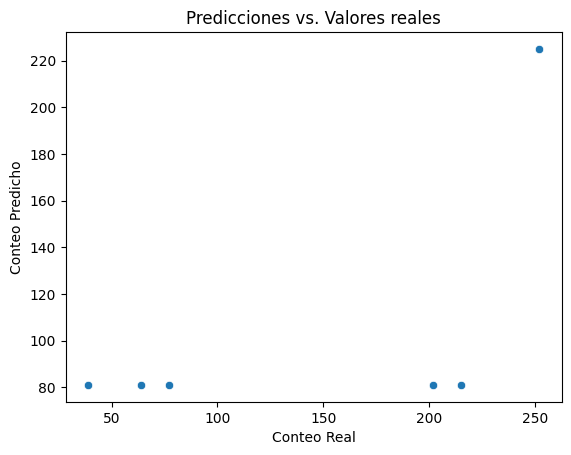

In [ ]:
# Visualización de resultados
sns.scatterplot(x=y_test, y=predicciones)
plt.xlabel('Conteo Real')
plt.ylabel('Conteo Predicho')
plt.title('Predicciones vs. Valores reales')
plt.show()

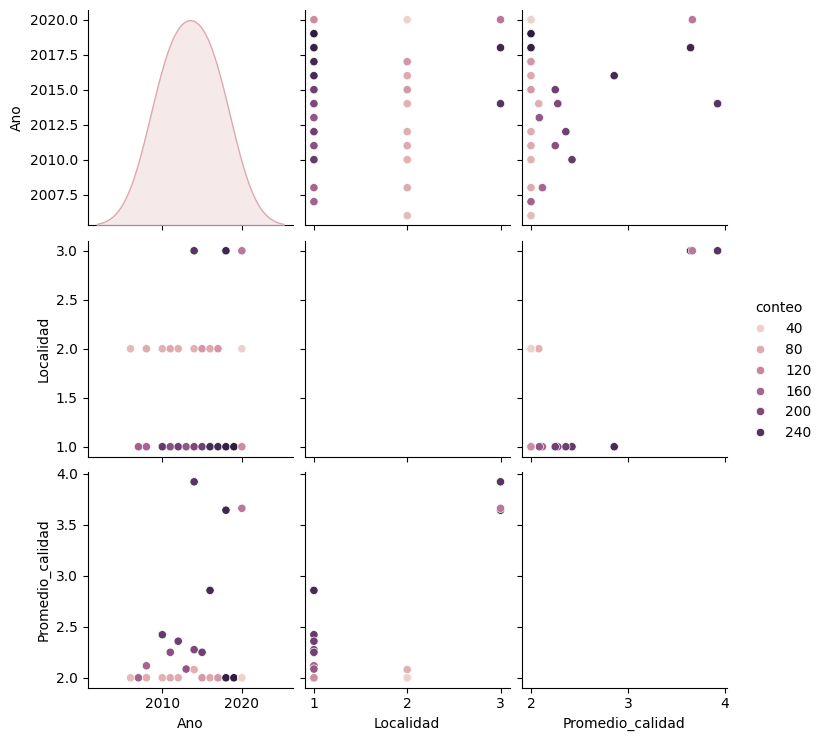

In [ ]:
# Visualización de resultados
import seaborn as sns
sns.pairplot(csv_unidos, hue='conteo', diag_kind='kde')
plt.show()

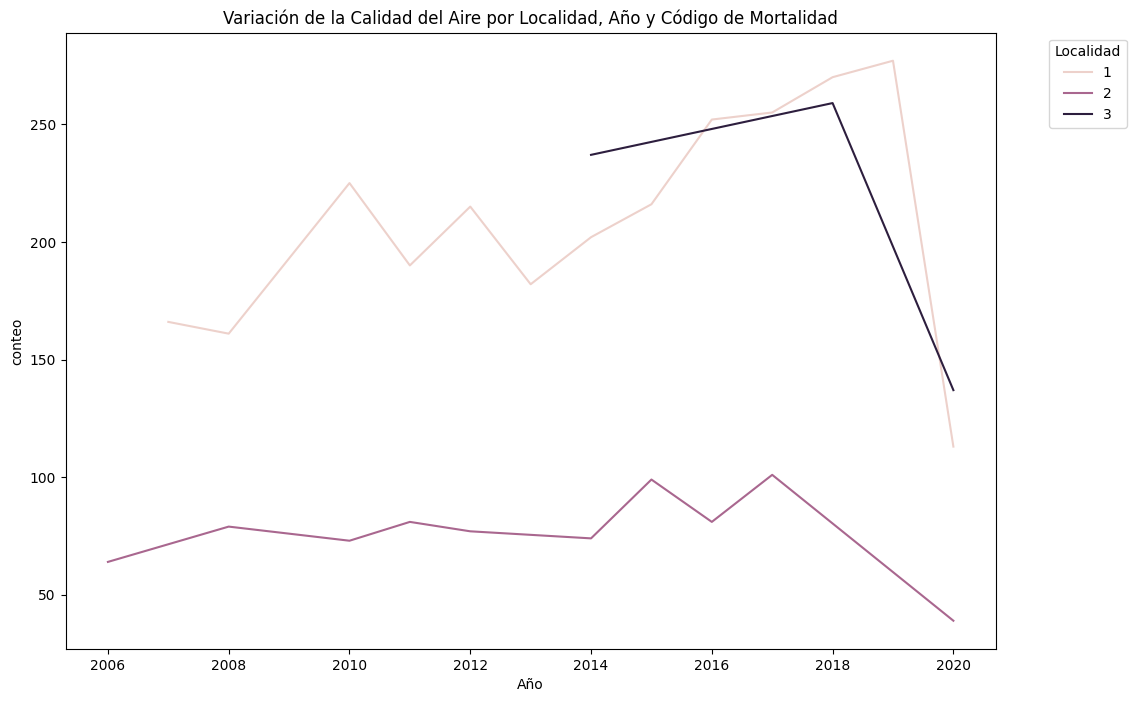

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Ano', y='conteo', hue='Localidad', data=csv_unidos, markers=True)
plt.title('conteo por año localidad')
plt.xlabel('Año')
plt.ylabel('conteo')
plt.legend(title='Localidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda para que no se solape con el gráfico
plt.show()

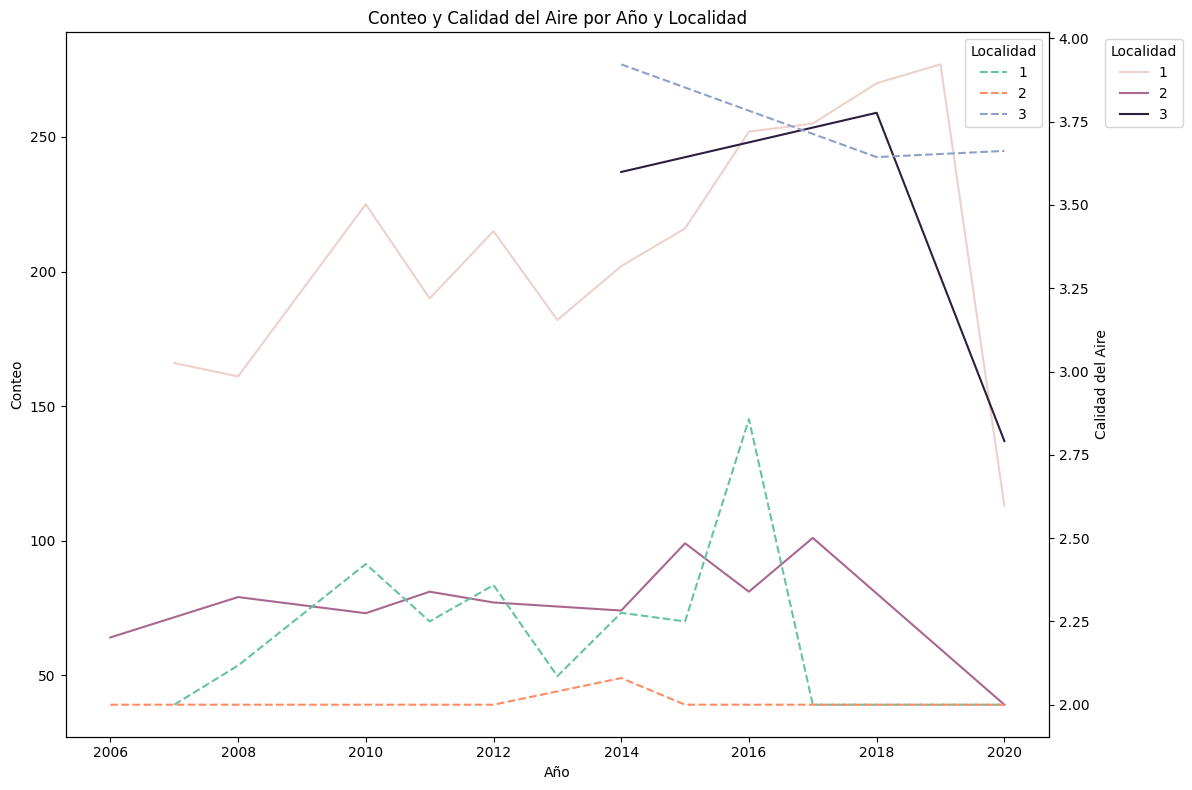

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graficar el conteo en el primer eje
sns.lineplot(x='Ano', y='conteo', hue='Localidad', data=csv_unidos, markers=True, ax=ax1)
ax1.set_title('Conteo y Calidad del Aire por Año y Localidad')
ax1.set_xlabel('Año')
ax1.set_ylabel('Conteo')
ax1.legend(title='Localidad', bbox_to_anchor=(1.05, 1), loc='upper left')

# Crear un segundo eje y graficar la calidad del aire
ax2 = ax1.twinx()
sns.lineplot(x='Ano', y='Promedio_calidad', hue='Localidad', data=csv_unidos, markers=True, ax=ax2, linestyle='--', palette='Set2')
ax2.set_ylabel('Calidad del Aire')

# Ajustar el diseño para que ambas líneas sean visibles
fig.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Visualizar la relación entre la calidad del aire y los casos de EPOC por año y localidad
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Ano', y='conteo', hue='Promedio_calidad', size='Promedio_calidad', data=csv_unidos, palette='viridis', sizes=(20, 200))
plt.title('Relación entre Calidad del Aire y Casos de EPOC por Año y Localidad')
plt.xlabel('Año')
plt.ylabel('Casos de EPOC')
plt.legend(title='Promedio Calidad del Aire')
plt.show()